In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt

In [ ]:
mypaths=[]
for name in glob('/breast-histopathology-images/IDC_regular_ps50_idx5/*',recursive=True):
    mypaths.append(name)
print(mypaths[:5])

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10304', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/12868', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10274', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/12818']


In [ ]:
len(mypaths)

279

In [ ]:
mypaths[:5]

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295',
 '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10304',
 '../input/breast-histopathology-images/IDC_regular_ps50_idx5/12868',
 '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10274',
 '../input/breast-histopathology-images/IDC_regular_ps50_idx5/12818']

In [ ]:
mp=mypaths[60:75]
imagePatches=[]
for i in mp:
    imagePatches+=glob(i+'/*/*.png', recursive=True)


In [ ]:
len(imagePatches)

14998

In [ ]:
# Two arrays holding images by class type

class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [ ]:
print(len(class0))
print("hi")
len(class1)

10314
hi


4684

In [ ]:
sampled_class0 = random.sample(class0, len(class1))
sampled_class1 = random.sample(class1, len(class1))
len(sampled_class1)

4684

In [ ]:
print(len(sampled_class0))

4684


In [ ]:
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
      if i.endswith('.png'):
        img = cv2.imread(i ,cv2.IMREAD_COLOR)
        img_sized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
        img_arrays.append([img_sized, label])
    return img_arrays

In [ ]:
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)
print('done')

done


In [ ]:
class0_array[0]

[array([[[214, 197, 223],
         [214, 197, 223],
         [214, 198, 224],
         ...,
         [205, 190, 237],
         [205, 191, 237],
         [205, 191, 237]],
 
        [[214, 197, 223],
         [214, 197, 223],
         [214, 198, 223],
         ...,
         [205, 190, 237],
         [205, 191, 237],
         [205, 191, 237]],
 
        [[214, 197, 223],
         [214, 197, 223],
         [214, 198, 224],
         ...,
         [205, 190, 237],
         [205, 191, 237],
         [205, 191, 237]],
 
        ...,
 
        [[193, 169, 221],
         [193, 169, 221],
         [192, 168, 219],
         ...,
         [201, 183, 201],
         [201, 183, 200],
         [201, 183, 200]],
 
        [[192, 168, 221],
         [192, 168, 221],
         [191, 166, 219],
         ...,
         [201, 184, 201],
         [201, 184, 200],
         [201, 184, 200]],
 
        [[192, 168, 221],
         [192, 168, 221],
         [191, 166, 219],
         ...,
         [201, 184, 201],
  

In [ ]:
combined_data = np.concatenate((class0_array, class1_array))


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
combined_data[0]

array([array([[[214, 197, 223],
        [214, 197, 223],
        [214, 198, 224],
        ...,
        [205, 190, 237],
        [205, 191, 237],
        [205, 191, 237]],

       [[214, 197, 223],
        [214, 197, 223],
        [214, 198, 223],
        ...,
        [205, 190, 237],
        [205, 191, 237],
        [205, 191, 237]],

       [[214, 197, 223],
        [214, 197, 223],
        [214, 198, 224],
        ...,
        [205, 190, 237],
        [205, 191, 237],
        [205, 191, 237]],

       ...,

       [[193, 169, 221],
        [193, 169, 221],
        [192, 168, 219],
        ...,
        [201, 183, 201],
        [201, 183, 200],
        [201, 183, 200]],

       [[192, 168, 221],
        [192, 168, 221],
        [191, 166, 219],
        ...,
        [201, 184, 201],
        [201, 184, 200],
        [201, 184, 200]],

       [[192, 168, 221],
        [192, 168, 221],
        [191, 166, 219],
        ...,
        [201, 184, 201],
        [201, 184, 200],
        [201, 184

In [ ]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1, 224,224,3)

In [ ]:
X.shape

(9368, 224, 224, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7026, 224, 224, 3) (2342, 224, 224, 3) (7026, 2) (2342, 2)


In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, AvgPool2D, Input, Dropout, Flatten, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19

#Image Transformation Libraries
import cv2
from imgaug import augmenters as iaa

In [ ]:
#base_learning_rate = 1e-5
#batch_size=32
#epochs = 10

In [ ]:
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)


In [ ]:
def create_model():
    img_input = keras.layers.Input(shape=(224, 224, 3))

    # Block 1
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='block1_conv1', trainable=False)(img_input)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='block1_conv2', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block1_pool', trainable=False)(x)

    #Block 2
    x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='block2_conv1',trainable=False)(x)
    x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='block2_conv2', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block2_pool', trainable=False)(x)

    #Block 3
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv1',trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv2', trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv3', trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv4', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block3_pool', trainable=False)(x)

    #Block 4
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv1')(x)
    x = BatchNormalization(name='block4_bn1')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv2')(x)
    x = BatchNormalization(name='block4_bn2')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv3')(x)
    x = BatchNormalization(name='block4_bn3')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv4')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block4_pool')(x)

    #Block 5
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv1')(x)
    x = BatchNormalization(name='block5_bn1')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv2')(x)
    x = BatchNormalization(name='block5_bn2')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv3')(x)
    x = BatchNormalization(name='block5_bn3')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv4')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block5_pool')(x)
    
    #Other layers
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout_1')(x)
    x = Dense(1000, activation='relu', name='fc2')(x)
    x = Dropout(0.7, name='dropout_2')(x)
    x = Dense(512, activation='relu', name='fc3')(x)
    x = Dropout(0.5, name='dropout_3')(x)
    x = Dense(2, activation='sigmoid', name='predictions')(x)
    
    model = Model(inputs=img_input, outputs=x)
    return model

In [ ]:
#base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False)

In [ ]:
#base_model.summary()

In [ ]:
#with tpu_strategy.scope():
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(lr=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall','Precision']
)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
history=model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=10)

Epoch 1/10
220/220 [==============================] - 1329s 6s/step - loss: 1.3857 - accuracy: 0.5879 - recall: 0.5427 - precision: 0.5788 - val_loss: 0.5500 - val_accuracy: 0.7938 - val_recall: 0.8360 - val_precision: 0.7739
Epoch 2/10
220/220 [==============================] - 1291s 6s/step - loss: 0.7385 - accuracy: 0.7398 - recall: 0.7053 - precision: 0.7085 - val_loss: 0.4299 - val_accuracy: 0.8202 - val_recall: 0.8395 - val_precision: 0.8084
Epoch 3/10
220/220 [==============================] - 1291s 6s/step - loss: 0.5725 - accuracy: 0.7852 - recall: 0.7542 - precision: 0.7529 - val_loss: 0.4018 - val_accuracy: 0.8360 - val_recall: 0.8488 - val_precision: 0.8246
Epoch 4/10
220/220 [==============================] - 1291s 6s/step - loss: 0.5074 - accuracy: 0.8000 - recall: 0.7771 - precision: 0.7701 - val_loss: 0.4052 - val_accuracy: 0.8318 - val_recall: 0.8429 - val_precision: 0.8215
Epoch 5/10
220/220 [==============================] - 1291s 6s/step - loss: 0.4703 - accuracy: 0

In [ ]:
e=model.evaluate(X_test,y_test)

74/74 [==============================] - 320s 4s/step - loss: 0.3506 - accuracy: 0.8386 - recall: 0.8467 - precision: 0.8346


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

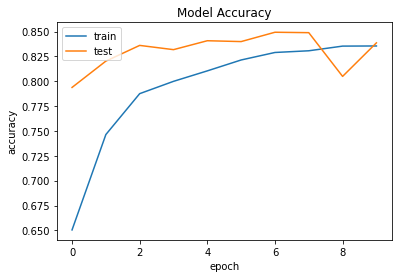

In [ ]:
#plotting the Accuracy of test and training sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

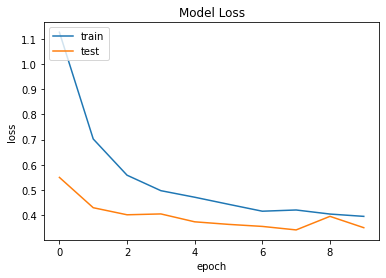

In [ ]:
#plotting the loss of test and training sets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('vgg19.h5')

In [ ]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [ ]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report')
print(classification_report(Y_test, Y_pred, target_names=['Negative','Positive']))

Confusion Matrix
[[999 190]
 [188 965]]
Classification Report
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      1189
    Positive       0.84      0.84      0.84      1153

    accuracy                           0.84      2342
   macro avg       0.84      0.84      0.84      2342
weighted avg       0.84      0.84      0.84      2342

